# Lab Task:

####  Model: Build and train a custom CNN with the following structure:

Conv2D(64 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(128 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(256 filters, (3×3), ReLU) → Dropout(0.3) → MaxPooling2D(2×2)

Flatten → Dense(256, ReLU) → Dropout(0.5) → Dense(1, Sigmoid)

#### Dataset: Use only two classes:

from the last lab tasks

#### Compile with: binary_crossentropy loss and adam optimizer.

#### Train and evaluate the model.

In [63]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [ ]:
checkpoints = r'C:\Users\kingk\Downloads\\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [ ]:
train_dir = r'C:\Users\kingk\Downloads\archive (4)\Computer vision\train'
validation_dir = r'C:\Users\kingk\Downloads\archive (4)\Computer vision\validation'
test_dir = r'C:\Users\kingk\Downloads\archive (4)\Computer vision\test'

In [77]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64, 64, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [78]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 6, 6, 128)       

In [79]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [80]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(64, 64),batch_size=32,class_mode='binary')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [81]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [ ]:
step_size_train = train_generator.n//train_generator.batch_size

model_history = model.fit(train_generator,
                    validation_data =validation_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,
                    callbacks=callbacks)

In [82]:
model_history.history

{'loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'acc': [0.2512499988079071,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25],
 'val_loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_acc': [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]}

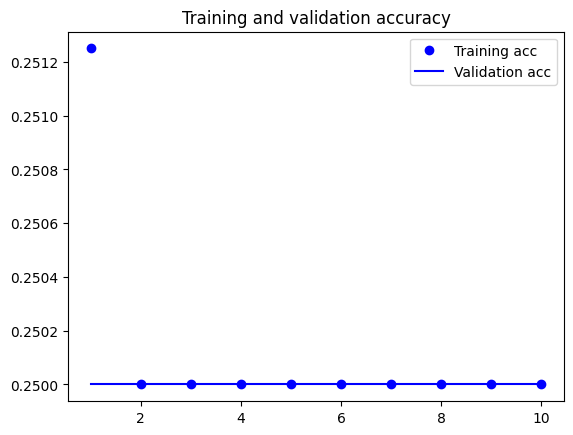

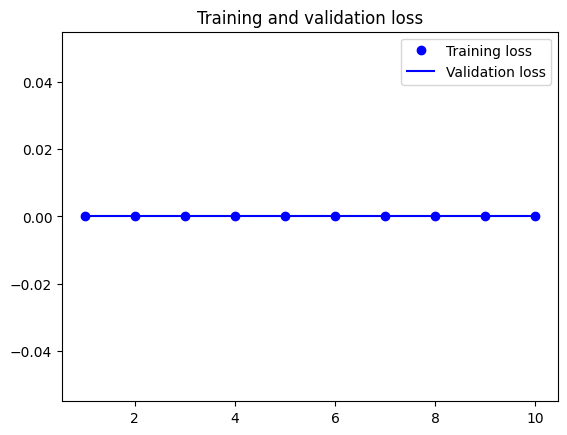

<Figure size 640x480 with 0 Axes>

In [72]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'C:\Users\abdurrehman\Downloads\archive (4)\checkpoints\model_Accuracy.png')

In [ ]:
model.save(r'C:\Users\kingk\Downloads\archive (4)\checkpoints\E1-cp-0012-loss0.21.h5')

Found 200 images belonging to 4 classes.
7/7 [==============================] - 1s 87ms/step


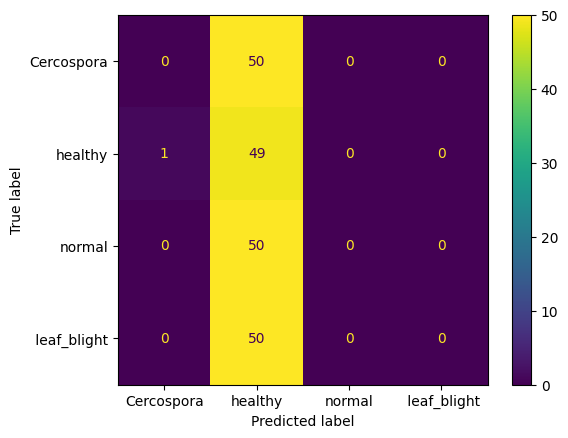

<Figure size 640x480 with 0 Axes>

In [ ]:
#model = load_model(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_lab11.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(64,64), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis=1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cercospora','healthy','normal', ' leaf_blight'])
disp.plot()
plt.show()

plt.savefig(r'C:\Users\kingk\Downloads\archive (4)\confusion_matrics.jpg')

In [ ]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))